In [1]:
%pylab inline

from pmesh.pm import ParticleMesh
from nbodykit.lab import BigFileCatalog, BigFileMesh, FFTPower

sys.path.append('/global/homes/c/chmodi/Programs/cosmo4d/train_nets/')
import features as ft


Populating the interactive namespace from numpy and matplotlib


/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/dask/context.py:23: UserWarning: The dask.set_options function has been deprecated. Please use dask.config.set instead
  warnings.warn("The dask.set_options function has been deprecated. "


In [16]:
dpath = '/global/cscratch1/sd/yfeng1/m3127/lowres/'

bs, nc = 256, 256
sim = '%d-9100-fixed'%nc
aa = 0.2000

def atoz(a): return 1/a - 1
def ztoa(z): return 1/(z+1)
zz = atoz(aa)
print('Redshift = %0.2f'%zz)

pm = ParticleMesh(BoxSize = bs, Nmesh = [nc, nc, nc])

dm = BigFileCatalog(dpath + sim + '/fastpm_%0.4f/'%aa, dataset='1')
print(dm.columns)
# halos = BigFileCatalog(dpath + sim	+ '/fastpm_%0.4f/'%aa, dataset='LL-0.200')
# print(halos.columns)






Redshift = 4.00
['ID', 'Position', 'Selection', 'Value', 'Velocity', 'Weight']


In [2]:
bs = 400
nc = 128
ncf = 512
step = 5
stepf = 40
path = '/project/projectdirs/astro250/chmodi/cosmo4d/data/z00/'
pm = ParticleMesh(BoxSize=bs, Nmesh = [nc, nc, nc])
pmf = ParticleMesh(BoxSize=bs, Nmesh = [ncf, ncf, ncf])

In [3]:
seed = 100
mesh = BigFileMesh(path + 'L%04d_N%04d_S%04d_%02dstep/mesh'%(bs, nc, seed, step), 'd').paint()
meshf = BigFileMesh(path + 'L%04d_N%04d_S%04d_%02dstep/mesh'%(bs, ncf, seed, stepf), 'd').paint()
cat = BigFileCatalog(path + 'L%04d_N%04d_S%04d_%02dstep/FOF'%(bs, ncf, seed, stepf))
parts = BigFileCatalog(path + 'L%04d_N%04d_S%04d_%02dstep/dynamic/1'%(bs, nc, seed, step))

In [4]:
hpos = cat['PeakPosition'].compute()
hmass = cat['Mass'].compute()
hlen = cat['Length'].compute()

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/dask/base.py:828: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


In [5]:
hpos.shape[0]/bs**3

0.00658259375

In [6]:
parts['Position'].compute().shape

(2097152, 3)

In [9]:
mesh2 = pm.paint(parts['Position'])
meshsub = pmf.paint(parts['Position'])
meshsubn = pmf.paint(parts['Position'], resampler='nearest')
meshsubsm = ft.smooth(meshsub, 3, 'fingauss')

In [10]:
(meshsub[...] > 0).sum()

11339728

In [11]:
num = int(1e-3*bs**3)
hpmesh = pmf.paint(hpos[:num])
dmread0 = mesh.readout(hpos[:num])
dmread = meshsub.readout(hpos[:num])
dmreadnn = meshsubn.readout(hpos[:num])
dmreadsm = meshsubsm.readout(hpos[:num])


In [12]:
(dmread <= 0).sum()/num, (dmreadnn <= 0).sum()/num, (dmreadsm <= 0).sum()/num

(0.037765625, 0.17696875, 0.0)

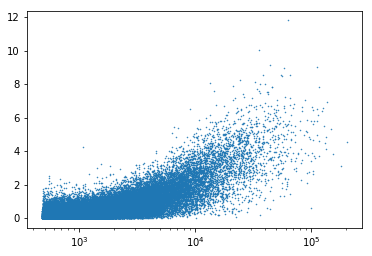

In [13]:
plt.plot(hmass[:num], dmread, '.', ms=1)
# plt.plot(hmass[:num], dmread0, '.', ms=1)
plt.xscale('log')

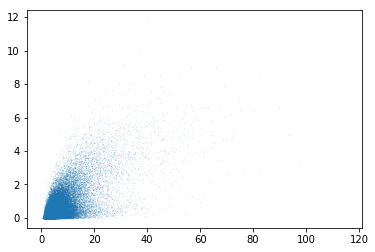

In [105]:
# plt.plot(dmread0[-10000:], dmread[-10000:], '.', ms=1)
plt.plot(dmread0[:], dmread[:], '.', ms=.1)
# plt.xscale('log')

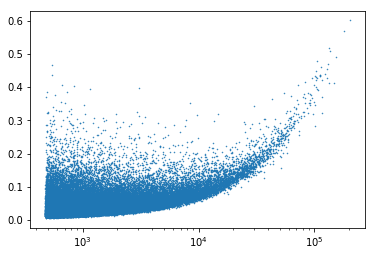

In [83]:
plt.plot(hmass[:num], dmreadsm, '.', ms=1)
plt.xscale('log')

In [94]:
((meshsub[...] > 0) & (hpmesh[...] > 0)).sum()/(meshsub[...] > 0).sum()

0.03365495186480663

In [76]:
sidef = bs/ncf

In [77]:
hmass[-1]/13/sidef**3

8.848878435649466

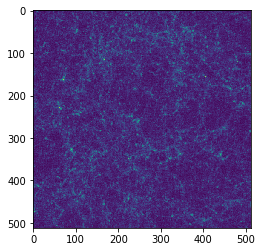

In [78]:
plt.imshow(meshsub[...].sum(axis=0))